In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [25]:
whole = pd.read_csv('whole_stats.csv')

# Bin the age column according to generation.
bins = [0, 24.5, 43.5, 55.5, 74.5, 100]
labels = ["GenZ", "GenY", "GenX", "BabyBoomers", "Traditionalists"]
whole['Age'] = pd.cut(whole['Age'], bins=bins, labels=labels)

# Map genders to binary values.
g_mappings = {
   'Male': 0,
   'Female': 1,
}
whole['Gender'] = whole['Gender'].apply(lambda x: g_mappings[x])

# Map generations to categorical values.
a_mappings = {
   'GenZ': 0,
   'GenY': 1,
   'GenX': 2,
   'BabyBoomers': 3,
   'Traditionalists': 4
}
whole['Age'] = whole['Age'].apply(lambda x: a_mappings[x])

In [26]:
whole = whole.drop(columns = ['Author', 'Full Link'])

In [28]:
# Grab a subset of the data to test on.
one_thou = whole[0:1000]

In [52]:
tsne_em = TSNE(n_components=2, perplexity=5.0, n_iter=1000, verbose=1).fit_transform(one_thou)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.031s...
[t-SNE] Computed neighbors for 1000 samples in 0.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.601589
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.829124
[t-SNE] KL divergence after 1000 iterations: 1.133976


In [41]:
# Pre-plotting.

tsne_df = pd.DataFrame(tsne_em)
tsne_df['Gender'] = one_thou['Gender'].values

color = []
for observation in tsne_df['Gender']:
    if observation == 0:
        color.append('c')
    else:
        color.append('m')
        
position = list(range(len(one_thou)))

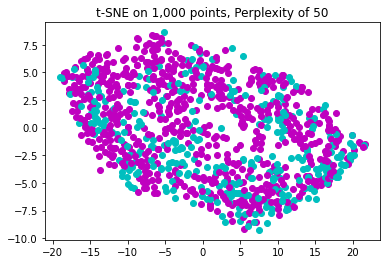

In [45]:
# Plot the results of TSNE on the subset of 1,000 points, perplexity of 50.

vis_x = tsne_df[0]
vis_y = tsne_df[1]
gender = tsne_df['Gender']

for i, c in zip(position, color):
    plt.scatter(vis_x[i], vis_y[i], c = c)

plt.title('t-SNE on 1,000 points, Perplexity of 50')
plt.show()

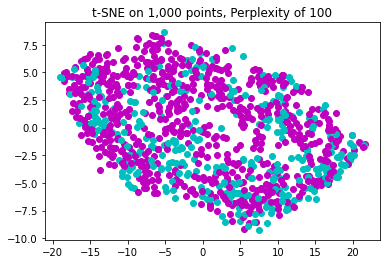

In [42]:
# Plot the results of TSNE on the subset of 1,000 points, perplexity of 100.

vis_x = tsne_df[0]
vis_y = tsne_df[1]
gender = tsne_df['Gender']

for i, c in zip(position, color):
    plt.scatter(vis_x[i], vis_y[i], c = c)

plt.title('t-SNE on 1,000 points, Perplexity of 100')
plt.show()

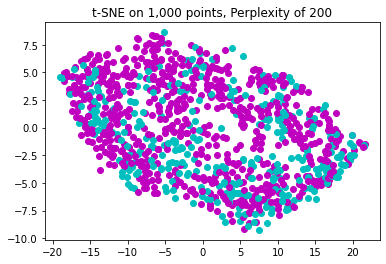

In [47]:
# Plot the results of TSNE on the subset of 1,000 points, perplexity of 200.

vis_x = tsne_df[0]
vis_y = tsne_df[1]
gender = tsne_df['Gender']

for i, c in zip(position, color):
    plt.scatter(vis_x[i], vis_y[i], c = c)

plt.title('t-SNE on 1,000 points, Perplexity of 200')
plt.show()

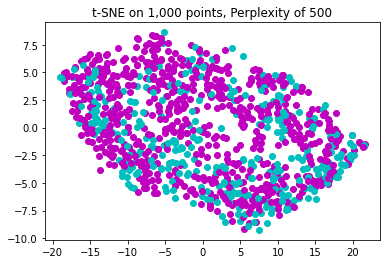

In [49]:
# Plot the results of TSNE on the subset of 1,000 points, perplexity of 500.

vis_x = tsne_df[0]
vis_y = tsne_df[1]
gender = tsne_df['Gender']

for i, c in zip(position, color):
    plt.scatter(vis_x[i], vis_y[i], c = c)

plt.title('t-SNE on 1,000 points, Perplexity of 500')
plt.show()

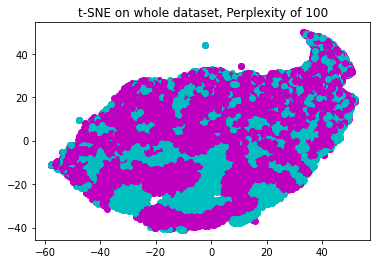

In [37]:
# Plot the results of TSNE on the whole set of points, perplexity of 100.

vis_x = tsne_df[0]
vis_y = tsne_df[1]
gender = tsne_df['Gender']

for i, c in zip(position, color):
    plt.scatter(vis_x[i], vis_y[i], c = c)

plt.title('t-SNE on whole dataset, Perplexity of 100')
plt.show()

In [38]:
# TSNE FOR GENERATIONS:
# Pre-plotting.

tsne_df = pd.DataFrame(tsne_em)
tsne_df['Age'] = whole['Age'].values

color = []
for observation in tsne_df['Age']:
    if observation == 0:
        color.append('c')
    if observation == 1:
        color.append('y')
    if observation == 2:
        color.append('g')
    if observation == 3:
        color.append('m')
    if observation == 4:
        color.append('r')
        
position = list(range(len(whole)))

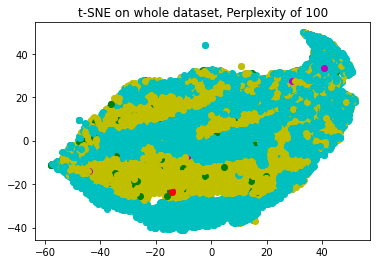

In [39]:
# Plot the results of TSNE on the whole set of points, perplexity of 100.

vis_x = tsne_df[0]
vis_y = tsne_df[1]
age = tsne_df['Age']

for i, c in zip(position, color):
    plt.scatter(vis_x[i], vis_y[i], c = c)

plt.title('t-SNE on whole dataset, Perplexity of 100')
plt.show()